# Brain MRI Images for Brain Tumor Detection

https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
path = ".\\BrainTumorData"

In [3]:
def get_working_dir(path):
    working_dir = []
    for root, _, _ in os.walk(path):
        working_dir.append(root)
    return working_dir                

In [4]:
get_working_dir(path)

['.\\BrainTumorData',
 '.\\BrainTumorData\\test',
 '.\\BrainTumorData\\test\\no',
 '.\\BrainTumorData\\test\\yes',
 '.\\BrainTumorData\\train',
 '.\\BrainTumorData\\train\\no',
 '.\\BrainTumorData\\train\\yes']

In [5]:
working_directories = ['.\\BrainTumorData\\test\\no','.\\BrainTumorData\\test\\yes', '.\\BrainTumorData\\train\\no', '.\\BrainTumorData\\train\\yes']

Let's count images in our working directories.

In [41]:
def remove_whitespace(path):
    filenames = os.listdir(path)
    for filename in filenames:
        os.rename(os.path.join(path,filename),os.path.join(path, filename.replace(' ', '_')))

In [45]:
remove_whitespace('.\\BrainTumorData\\train\\yes')

# EDA

In [46]:
def count_images(working_directories):
    counter = []
    for directory in working_directories:
        count = len([file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))])
        counter.append((directory, count))
    return counter

In [47]:
df = pd.DataFrame(count_images(working_directories), columns = ['Path', 'Count'], index = None)

In [48]:
df

,Path,Count
0,.\BrainTumorData\test\no,98
1,.\BrainTumorData\test\yes,155
2,.\BrainTumorData\train\no,98
3,.\BrainTumorData\train\yes,155


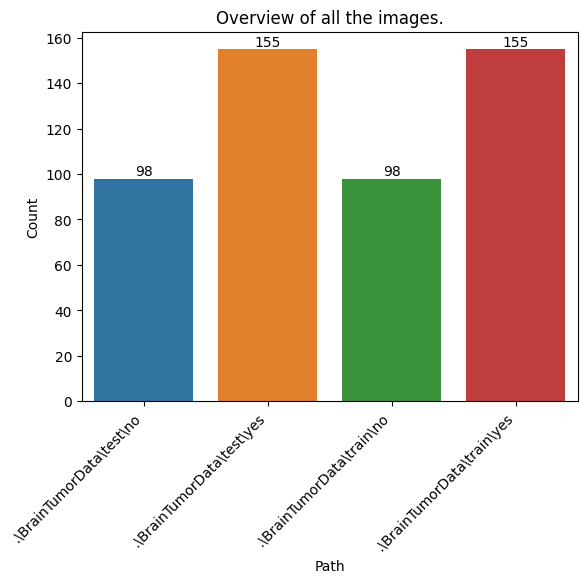

In [49]:
ax_1 = sns.barplot(x = df.Path, y = df.Count)
ax_1.set(title = 'Overview of all the images.')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax_1.bar_label(ax_1.containers[0])
plt.xlabel('Path')
plt.ylabel('Count')
plt.show()

Number of images are quite small and not equally contributed among dataset YES vs. NO. Dataset is skewed towards not positive Tumor images. As there are not a lot of images, let's check the resolutions of each image for further processing. We can easily change resolution by means of ImageDataGenerator but it is still better to understand the data before. In case of huge dataset the operation would take obviously some time, but with this small one, we can take our time.

In [50]:
# Only for temporal use

# def get_image_list(working_dir):
#     image_list = []
#     for directory in working_dir:
#         image_list.append([file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))])                         
#     return image_list

In [51]:
def get_path_of_images(path):
    path_of_images = []

    for root, _, file in os.walk(path):
        image_path = ([os.path.join(root, image_name) for image_name in os.listdir(root) 
                               if os.path.isfile(os.path.join(root, image_name))])  
        if len(image_path) != 0:
            path_of_images.append(image_path)    
        
    return path_of_images        

In [52]:
path_of_images = get_path_of_images(path)

In [53]:
len(path_of_images)

4

In [54]:
path_of_images

[['.\\BrainTumorData\\test\\no\\10_no.jpg',
  '.\\BrainTumorData\\test\\no\\11_no.jpg',
  '.\\BrainTumorData\\test\\no\\12_no.jpg',
  '.\\BrainTumorData\\test\\no\\13_no.jpg',
  '.\\BrainTumorData\\test\\no\\14_no.jpg',
  '.\\BrainTumorData\\test\\no\\15_no.jpg',
  '.\\BrainTumorData\\test\\no\\17_no.jpg',
  '.\\BrainTumorData\\test\\no\\18_no.jpg',
  '.\\BrainTumorData\\test\\no\\19_no.jpg',
  '.\\BrainTumorData\\test\\no\\1_no.jpeg',
  '.\\BrainTumorData\\test\\no\\20_no.jpg',
  '.\\BrainTumorData\\test\\no\\21_no.jpg',
  '.\\BrainTumorData\\test\\no\\22_no.jpg',
  '.\\BrainTumorData\\test\\no\\23_no.jpg',
  '.\\BrainTumorData\\test\\no\\24_no.jpg',
  '.\\BrainTumorData\\test\\no\\25_no.jpg',
  '.\\BrainTumorData\\test\\no\\26_no.jpg',
  '.\\BrainTumorData\\test\\no\\27_no.jpg',
  '.\\BrainTumorData\\test\\no\\28_no.jpg',
  '.\\BrainTumorData\\test\\no\\29_no.jpg',
  '.\\BrainTumorData\\test\\no\\2_no.jpeg',
  '.\\BrainTumorData\\test\\no\\30_no.jpg',
  '.\\BrainTumorData\\test\\no\\

We have got nested list of path of images, let's flatten the list.

In [55]:
def get_flattened_list(path_of_images):
    return [item for sublist in path_of_images for item in sublist]

In [56]:
flattened_path_of_images = get_flattened_list(path_of_images)

In [57]:
# just to check

len(flattened_path_of_images) == 98 + 155 + 98 + 155

True

In [58]:
len(flattened_path_of_images)

506

In [59]:
def get_resolution(flattened_path_of_images):
    resolution = []
    for file in flattened_path_of_images:
        image = cv2.imread(file)
        res = image.shape
        width = image.shape[0]
        height = image.shape[1]
        channels = image.shape[2]
        resolution.append((file, res, width, height, channels))
    return resolution

In [60]:
df2 = pd.DataFrame(get_resolution(flattened_path_of_images), columns = ('file_name', 'resolution', 'width', 'height', 'channels'))

In [65]:
df2.head()

,file_name,resolution,width,height,channels
0,.\BrainTumorData\test\no\10_no.jpg,"(201, 173, 3)",201,173,3
1,.\BrainTumorData\test\no\11_no.jpg,"(168, 300, 3)",168,300,3
2,.\BrainTumorData\test\no\12_no.jpg,"(183, 275, 3)",183,275,3
3,.\BrainTumorData\test\no\13_no.jpg,"(168, 300, 3)",168,300,3
4,.\BrainTumorData\test\no\14_no.jpg,"(197, 177, 3)",197,177,3


Let's make some statistics.

In [66]:
df2.describe()

,width,height,channels
count,506.000000,506.000000,506.0
mean,386.019763,354.237154,3.0
std,212.917340,216.896615,0.0
min,168.000000,150.000000,3.0
25%,248.000000,225.000000,3.0
50%,331.000000,278.000000,3.0
75%,442.000000,400.000000,3.0
max,1427.000000,1920.000000,3.0


In [67]:
def image_size(row):
    return (((row['width']*row['height']*row['channels'])/1024)/1024)

In [68]:
df2['size'] = df2.apply(image_size, axis=1)

In [69]:
df2.head()

,file_name,resolution,width,height,channels,size
0,.\BrainTumorData\test\no\10_no.jpg,"(201, 173, 3)",201,173,3,0.099486
1,.\BrainTumorData\test\no\11_no.jpg,"(168, 300, 3)",168,300,3,0.144196
2,.\BrainTumorData\test\no\12_no.jpg,"(183, 275, 3)",183,275,3,0.143981
3,.\BrainTumorData\test\no\13_no.jpg,"(168, 300, 3)",168,300,3,0.144196
4,.\BrainTumorData\test\no\14_no.jpg,"(197, 177, 3)",197,177,3,0.099761


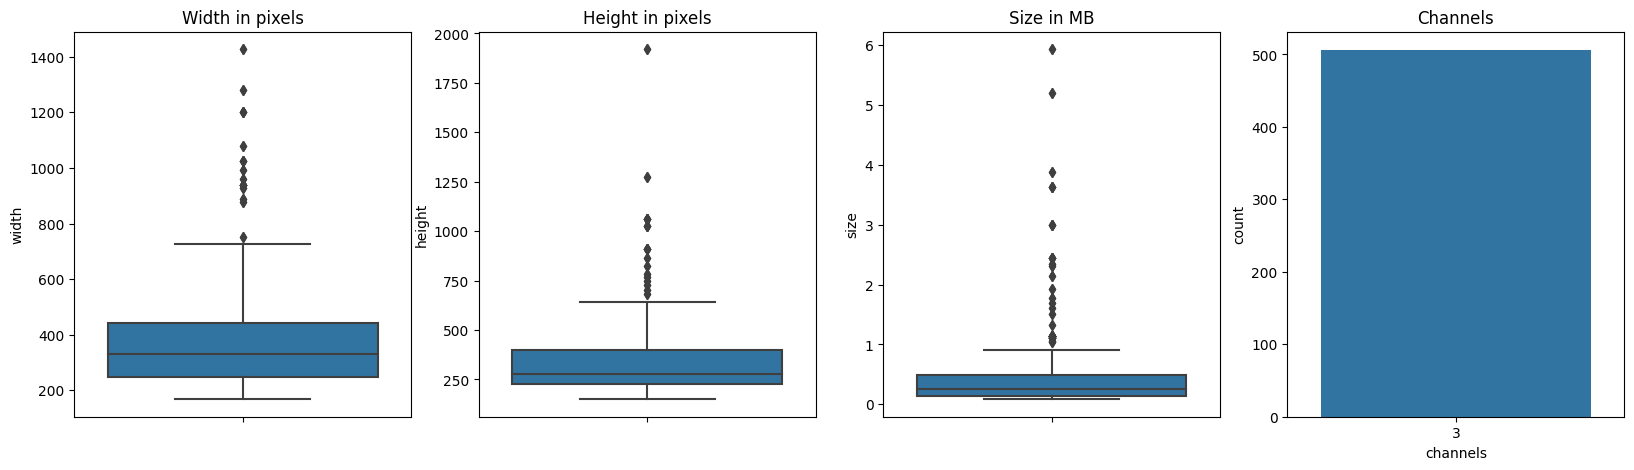

In [103]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,5))

sns.boxplot(data=df2, y = 'width', ax=ax1).set(title='Width in pixels')
sns.boxplot(data=df2, y = 'height', ax=ax2).set(title='Height in pixels')
sns.boxplot(data=df2, y = 'size', ax = ax3).set(title='Size in MB')
sns.countplot(data=df2, x='channels', ax=ax4).set(title='Channels')

plt.show()

We can see the dataset contains various size of images and are likely from different sources. 
<br>
<br>Now, let's plot some images.

In [160]:
images_to_print = np.random.choice(flattened_path_of_images, 14)
images_to_print

array(['.\\BrainTumorData\\test\\yes\\Y183.jpg',
       '.\\BrainTumorData\\test\\yes\\Y20.jpg',
       '.\\BrainTumorData\\train\\yes\\Y73.jpg',
       '.\\BrainTumorData\\test\\no\\no_9.png',
       '.\\BrainTumorData\\test\\yes\\Y91.jpg',
       '.\\BrainTumorData\\test\\yes\\Y194.jpg',
       '.\\BrainTumorData\\train\\no\\no_4.jpg',
       '.\\BrainTumorData\\test\\yes\\Y186.jpg',
       '.\\BrainTumorData\\test\\no\\no_1.jpg',
       '.\\BrainTumorData\\test\\yes\\Y8.jpg',
       '.\\BrainTumorData\\test\\no\\N21.jpg',
       '.\\BrainTumorData\\test\\no\\50_no.jpg',
       '.\\BrainTumorData\\test\\yes\\Y78.jpg',
       '.\\BrainTumorData\\test\\no\\50_no.jpg'], dtype='<U36')

In [161]:
def show_image(images_list):
    
    rows=2
    cols = 7
    n_images = rows * cols
    
    for image, i in zip(images_list, range(1,n_images+1)):
        if 'yes' in str(image):
            label = 'Positive'
        else:
            label ='Negative'
        plt.subplot(rows, cols, i)
        image = plt.imread(image)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')        


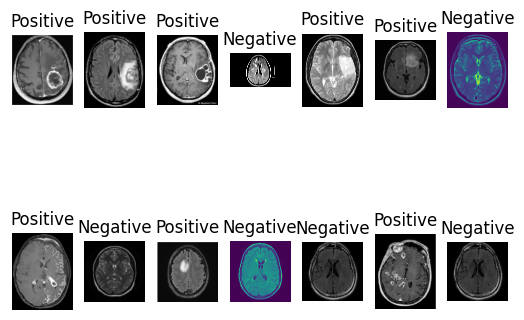

In [162]:
show_image(images_to_print)

# Image Data Generator

In [251]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.layers import GlobalAveragePooling2D as GAP, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.python.keras.layers.convolutional import Conv
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [320]:
# For GOOGLE COLAB 

# train_dir = '/content/train'
# validation_dir = '/content/test'

# rm -rf `find -type d -name .ipynb_checkpoints`

In [164]:
working_directories

['.\\BrainTumorData\\test\\no',
 '.\\BrainTumorData\\test\\yes',
 '.\\BrainTumorData\\train\\no',
 '.\\BrainTumorData\\train\\yes']

In [174]:
train_dir = '.\\BrainTumorData\\train\\'
validation_dir = '.\\BrainTumorData\\test\\'

In [194]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='binary',
                                                      target_size=(224, 224))

    validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='binary',
                                                                target_size=(224, 224))

    return train_generator, validation_generator

In [195]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [319]:
validation_generator.class_indices

{'no': 0, 'yes': 1}

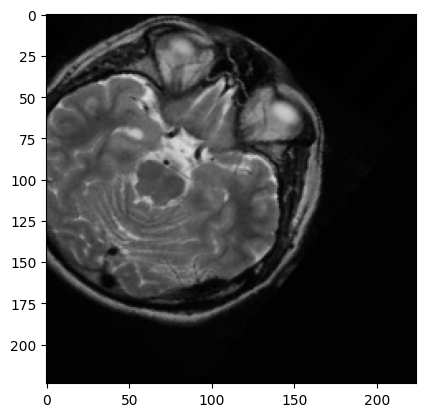

In [196]:
im = train_generator[0][0][10]
plt.imshow(im)
plt.show()

# Classification model

Let's create a class to being able easily use only instances for transfer learining. We will compare the results after 50 Epochs (training done on Google Colab) if traning not stopped before by using callback.

In [370]:
class Classifier():   
    
    def __init__(self, base_model, model_name, train_set, valid_set, epochs = 1):
        
        self.base_model = base_model
        self.model_name = model_name
        self.train_set = train_set
        self.valid_set = valid_set
        self.epochs = epochs
        
        # allow transfer learning
        
        self.base_model.trainable = True
        
        # create model 
        
        model = Sequential([
            Input(shape=(224, 224, 3)),
            BatchNormalization(),
            self.base_model,
            BatchNormalization(),
            GAP(),
            Dense(1, activation='sigmoid')
        ])
        
        self.model = model
        self.model.summary()
        
        # compile model 
              
        self.model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                      metrics=['accuracy'])
    
        # define callback
               
        callbacks = [EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
                     ModelCheckpoint(self.model_name+".h5", monitor="val_loss", save_best_only=True)]

        self.callbacks = callbacks 
        
    # defined as separated function for better handling and manipulation
    
    def model_fit(self):
        
        history = self.model.fit(self.train_set, validation_data = self.valid_set, callbacks=self.callbacks, epochs=self.epochs)
        
        return history       
        

In [310]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.show()

In [314]:
res_net_50 = Classifier(
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet'),
    model_name = 'ResNet50',
    train_set = train_generator,
    valid_set = validation_generator,
    epochs = 1   # just for testing purpose
)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_42 (Bat  (None, 224, 224, 3)      12        
 chNormalization)                                                
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 batch_normalization_43 (Bat  (None, 7, 7, 2048)       8192      
 chNormalization)                                                
                                                                 
 global_average_pooling2d_22  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_41 (Dense)            (None, 1)                 2049      
                                                     

In [312]:
res_net_results = res_net_50.model_fit()

8/8 [==============================] - 122s 16s/step - loss: 0.2551 - accuracy: 0.9407 - val_loss: 1.7500 - val_accuracy: 0.3874
Model saved under name: ResNet50.h5


In [315]:
inception_V3 = Classifier(
    base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet'),
    model_name = 'Inception_V3',
    train_set = train_generator,
    valid_set = validation_generator,
    epochs = 1  # just for testing purpose
)

87910968/87910968 [==============================] - 2s 0us/step
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_138 (Ba  (None, 224, 224, 3)      12        
 tchNormalization)                                               
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 batch_normalization_139 (Ba  (None, 5, 5, 2048)       8192      
 tchNormalization)                                               
                                                                 
 global_average_pooling2d_23  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_42 (Dense)            (None, 1)                

In [316]:
inception_V3_results = inception_V3.model_fit()

8/8 [==============================] - 121s 16s/step - loss: 0.2446 - accuracy: 0.9130 - val_loss: 1.8090 - val_accuracy: 0.3874
Model saved under name: Inception_V3.h5


In [317]:
mobile_net_v1 = Classifier(
    base_model = tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    model_name = 'MobileNet',
    train_set = train_generator,
    valid_set = validation_generator,
    epochs = 1 # just for testing purpose
)

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_140 (Ba  (None, 224, 224, 3)      12        
 tchNormalization)                                               
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 batch_normalization_141 (Ba  (None, 7, 7, 1024)       4096      
 tchNormalization)                                               
                                                                 
 global_average_pooling2d_24  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                      

In [318]:
mobile_net_v1.model_fit()

8/8 [==============================] - 122s 16s/step - loss: 0.2086 - accuracy: 0.9565 - val_loss: 1.8459 - val_accuracy: 0.3874
Model saved under name: MobileNet.h5


In [343]:
# For google colab to export history dictionary

def get_history_csv(history_file, history_name):
    pd.DataFrame.from_dict(history_file.history).to_csv(history_name+"csv",index=False)

___________________________________________________________________________________________________________________________

## Training done on GOOGLE COLAB

hence, here are results:

### ResNet50 :

Early stop activated after Epoch 6: 

<br> Epoch 5/50
8/8 [==============================] - 6s 715ms/step - loss: 0.4309 - accuracy: 0.8656 - val_loss: 0.7455 - val_accuracy: 0.3834
<br> Epoch 6/50
8/8 [==============================] - 6s 693ms/step - loss: 0.3698 - accuracy: 0.8814 - val_loss: 0.7755 - val_accuracy: 0.3834
<br> Model saved under name: ResNet50.h5


In [409]:
#model_ResNet50 = load_model('.\\BrainTumorData\\Results\\ResNet50.h5', compile = False)
model_ResNet50_history = pd.read_csv('.\\BrainTumorData\\Results\\historyResNet.csv')

### Inception_V3:

Traning lasts 50 Epchos:

<br> Epoch 49/50
8/8 [==============================] - 7s 925ms/step - loss: 0.0606 - accuracy: 0.9881 - val_loss: 0.1164 - val_accuracy: 0.9644
<br> Epoch 50/50
8/8 [==============================] - 7s 873ms/step - loss: 0.0342 - accuracy: 0.9960 - val_loss: 0.1116 - val_accuracy: 0.9644
<br> Model saved under name: Inception_V3.h5

In [549]:
model_Inception_V3 = load_model('.\\BrainTumorData\\Results\\Inception_V3.h5', compile = False)
model_Inception_V3_history = pd.read_csv('.\\BrainTumorData\\Results\\historyInception.csv')

### MobileNet_V1

Training lasts 50 Epochs:

<br> Epoch 49/50
8/8 [==============================] - 6s 830ms/step - loss: 0.1464 - accuracy: 0.9526 - val_loss: 0.1920 - val_accuracy: 0.9526
<br> Epoch 50/50
8/8 [==============================] - 5s 602ms/step - loss: 0.1448 - accuracy: 0.9644 - val_loss: 0.1814 - val_accuracy: 0.9565
<br> Model saved under name: MobileNet.h5

In [637]:
model_MobileNet_V1 = load_model('.\\BrainTumorData\\Results\\MobileNet.h5', compile = False)
model_MobileNet_V1_history = pd.read_csv('.\\BrainTumorData\\Results\\historyMobileNet.csv')

In [412]:
def get_index_start_one(df):
    df.index = np.arange(1, len(df)+1)
    return df

In [413]:
model_ResNet50_history = get_index_start_one(model_ResNet50_history)

In [414]:
model_ResNet50_history.head()

,loss,accuracy,val_loss,val_accuracy
1,0.662315,0.624506,0.683988,0.608696
2,0.577235,0.774704,0.689049,0.588933
3,0.517993,0.802372,0.693237,0.513834
4,0.479933,0.802372,0.708328,0.415020
5,0.430945,0.865613,0.745486,0.383399


In [415]:
model_Inception_V3_history = get_index_start_one(model_Inception_V3_history)

In [416]:
model_Inception_V3_history.head()

,loss,accuracy,val_loss,val_accuracy
1,0.697431,0.549407,0.821608,0.430830
2,0.627040,0.667984,0.831607,0.434783
3,0.572620,0.723320,0.804843,0.442688
4,0.525213,0.758893,0.768209,0.482213
5,0.477853,0.778656,0.726730,0.537549


In [417]:
model_MobileNet_V1_history = get_index_start_one(model_MobileNet_V1_history)

In [418]:
model_MobileNet_V1_history.head()

,loss,accuracy,val_loss,val_accuracy
1,0.597157,0.691700,1.145301,0.395257
2,0.565651,0.750988,1.151220,0.399209
3,0.548694,0.695652,1.142755,0.399209
4,0.514804,0.770751,1.115997,0.403162
5,0.477491,0.790514,1.088488,0.403162


In [461]:
def plot_extracted_history(extracted_history):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

    sns.lineplot(data=extracted_history, x=extracted_history.index, y = 'accuracy', ax=ax1, label = 'accuracy').set(title='Accuracy')
    sns.lineplot(data=extracted_history, x=extracted_history.index, y = 'val_accuracy',label = 'validation accuracy', ax=ax1)
    sns.lineplot(data=extracted_history, x= extracted_history.index, y = 'loss', label = 'loss', ax=ax2).set(title='Loss')
    sns.lineplot(data=extracted_history, x=extracted_history.index, y = 'val_loss', label = 'validation loss', ax=ax2)

    plt.show()

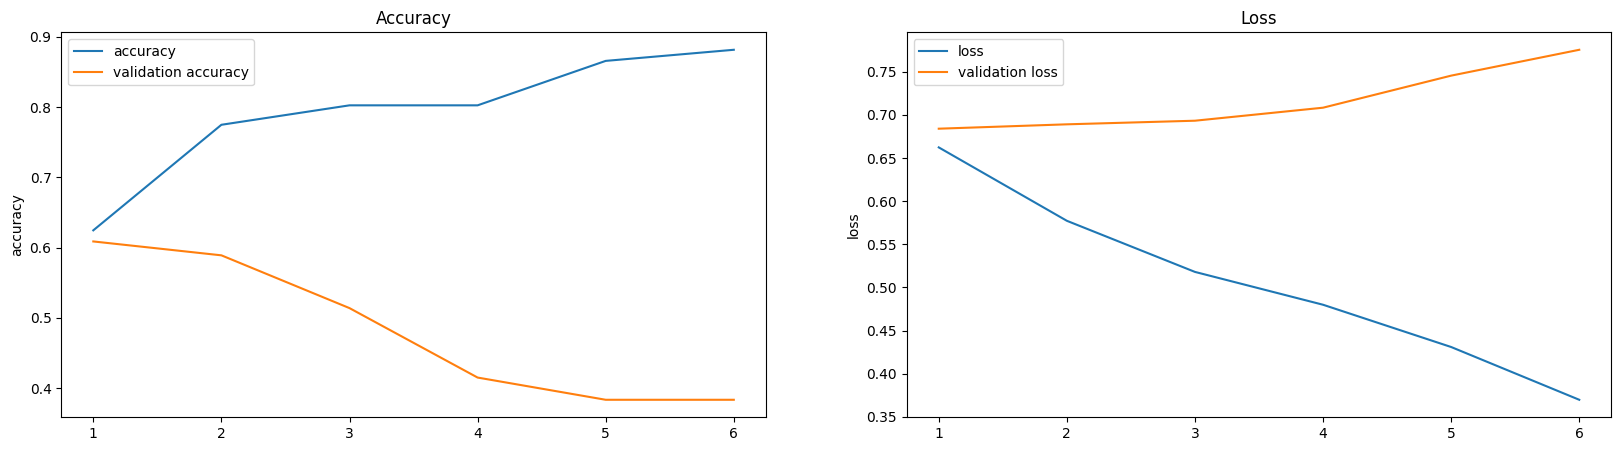

In [462]:
plot_extracted_history(model_ResNet50_history)

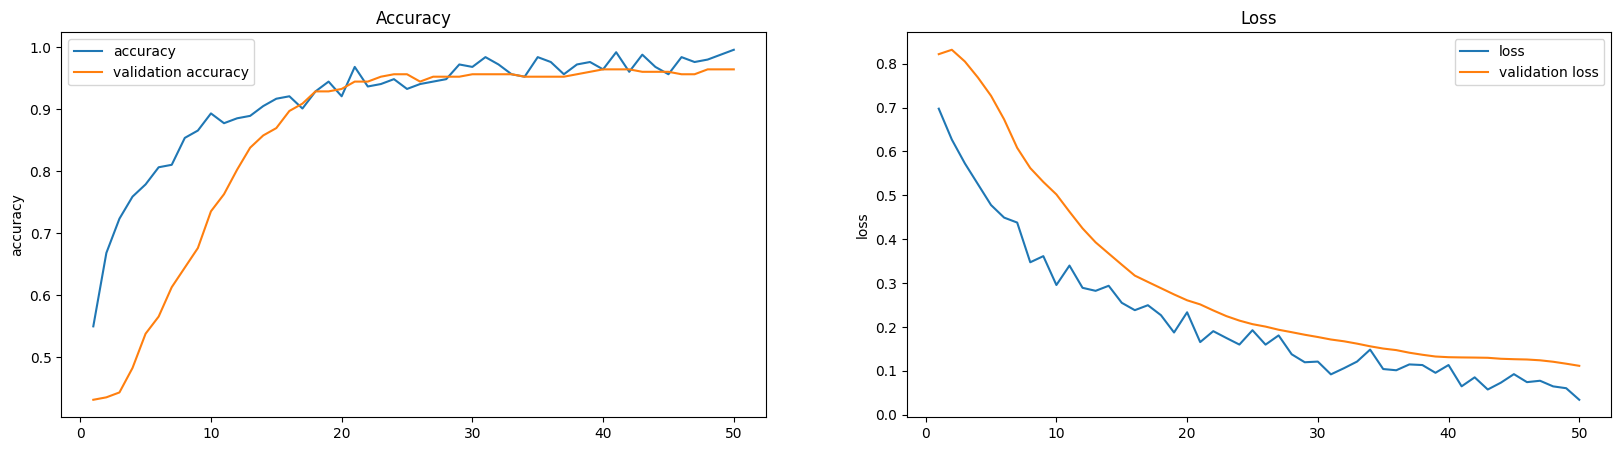

In [463]:
plot_extracted_history(model_Inception_V3_history)

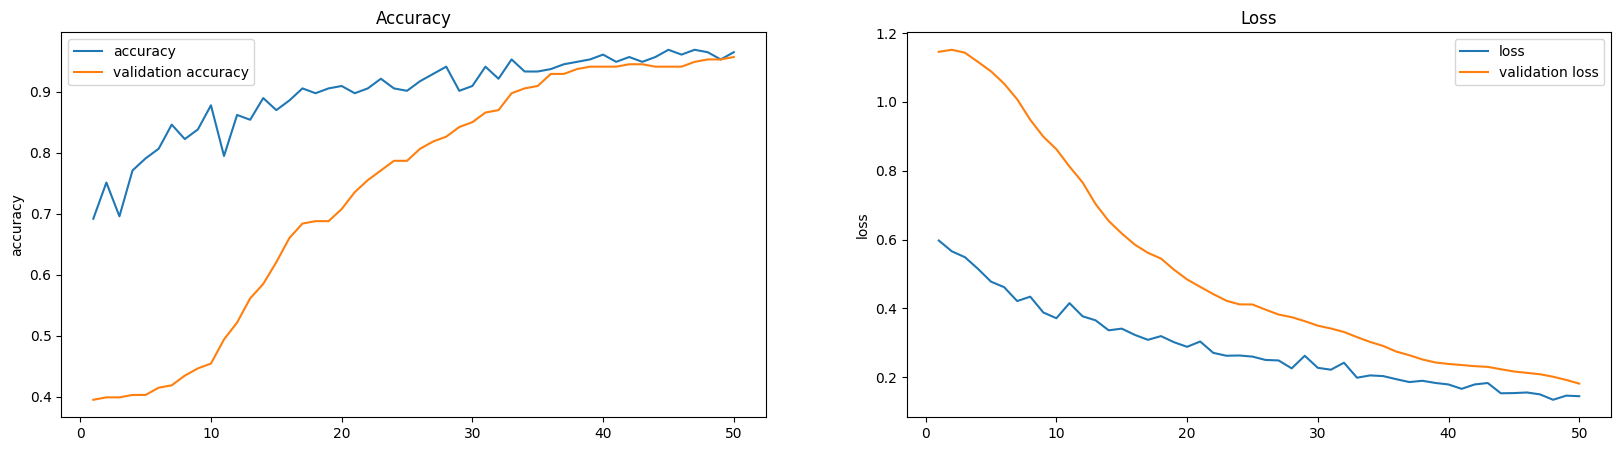

In [464]:
plot_extracted_history(model_MobileNet_V1_history)

In [525]:
final_matrix = pd.DataFrame()

In [532]:
final_matrix['ResNet50'] = model_ResNet50_history.tail(1).transpose()

In [533]:
final_matrix['Inception_V3'] = model_Inception_V3_history.tail(1).transpose()

In [534]:
final_matrix['MobileNet_V1'] = model_MobileNet_V1_history.tail(1).transpose()

In [535]:
final_matrix

,ResNet50,Inception_V3,MobileNet_V1
loss,0.369784,0.034221,0.144759
accuracy,0.881423,0.996047,0.964427
val_loss,0.775457,0.111566,0.181403
val_accuracy,0.383399,0.964427,0.956522


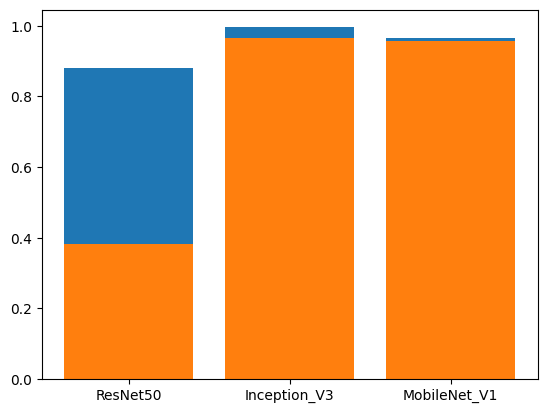

In [548]:
plt.bar(x=final_matrix.columns, height = final_matrix.iloc[1,:], label = 'accuracy')
plt.bar(x = final_matrix.columns, height = final_matrix.iloc[3, :], label = 'validation accuracy')

plt.show()

The best results we have obtained from transfer learing on top of Inception V3 model. Let's try on the image from google pictures. 

In [703]:
test_image = plt.imread('.\\BrainTumorData\\Yes_test.jpg')

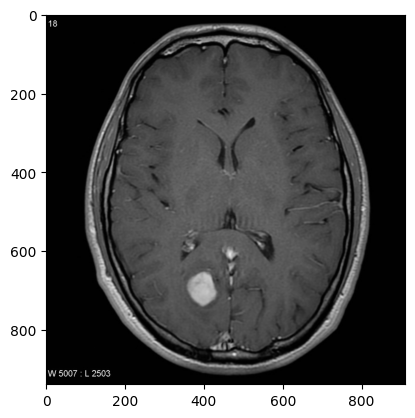

In [704]:
plt.imshow(test_image)
plt.show()

In [705]:
test_image.shape

(938, 911, 3)

In [706]:
test_image = cv2.resize(test_image, (224,224), interpolation = cv2.INTER_AREA)

In [707]:
test_image = np.expand_dims(test_image, axis=0)

In [708]:
test_image.shape

(1, 224, 224, 3)

In [709]:
result = model_Inception_V3.predict(test_image)

1/1 [==============================] - 0s 71ms/step


In [710]:
result[0][0]

1.6427141e-29

In [711]:
if result < 0.5:
    print (f'Image is tumor is NEGATIVE.')
else:
    print(f'Image is Tumor POSITIVE.')

Image is tumor is NEGATIVE.


__Even the results on train/test data seems to be quite nice, the real-life scenario is not working properly.__ 


__Some ideas from Kaggle (to be implemented in next noteboo:__

<br> - Using learning rate scheduler with keras. You may want to consider using learning rate schedulerto prevent overfitting. Learning rate scheduler can help you improve your model performance.
<br> - Target encoding: You may want to consider using target encodingto encode your categorical variables. Target encoding can help you improve your model performance.

<br> import category_encoders as ce
<br> target_encoder = ce.TargetEncoder()
<br> x_train = target_encoder.fit_transform(x_train, y_train)

<br> - About the loss. You may want to consider using focal loss. instead of cross entropy as your loss function. Focal loss is might help you improve your model performance

def binary_focal_loss(gamma = 2., alpha = .25):
 def tf_binary_focal_loss_fixed(y_true, y_pred):
 pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
 pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
 epsilon = K.epsilon()
 pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
 pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)
 return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) -K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
 return tf_binary_focal_loss_fixed
def categorical_focal_loss(gamma = 2., alpha = .25):
 def tf_categorical_focal_loss_fixed(y_true, y_pred):
 y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
 y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
 cross_entropy = -y_true * K.log(y_pred)
 loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
 return K.sum(loss, axis=1)
 return tf_categorical_focal_loss_fixed
 
<br> - Balanced Batches. Some trick that usually helps is to use balanced batches. It usually also work even if the datas is not imbalanced. You can use the balanced_batch_generator function from imblearn to create a balanced batch generator.

from imblearn.under_sampling import NearMiss
from imblearn.keras import balanced_batch_generator
training_generator, steps_per_epoch = balanced_batch_generator(X, y, sampler = NearMiss(), batch_size = 10, random_state = 42)
model.fit(training_generator, steps_per_epoch = steps_per_epoch ..